# KNN

In [1]:
# liberaries 
# for data manuplulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# to ignore futrure warnings
import warnings
warnings.filterwarnings('ignore')

# for model building and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/KNN/Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# type column is the target column
# there are 7 unique labels, one label for each type of animal

# EDA

In [4]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [5]:
# observation:
# there is no missing values but yet to confirm

In [6]:
df.shape

(101, 18)

In [7]:
# confirming null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
# no missing values and datatypes of columns is proper

# getting unique values of these columns

In [9]:
df_columns = df.columns.to_list()
df_columns

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [10]:
# printing unique values of columns
for col in df_columns:
    print(f'there are {df[col].nunique()} unique values in {col} column')
    print(' ')
    print(df[col].unique())
    print('--' * 30)

there are 100 unique values in animal name column
 
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
-----------------------------------------------

In [11]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
df.shape

(101, 18)

In [13]:
# percentage of missing values

print((df.isna().sum()/df.shape[0])*100)

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64


In [14]:
# checking for duplicated values

df.duplicated().sum()

0

In [15]:
# there is no duplicated values

In [16]:
# dropping "animal name" column because it is of no use for our prediction
# because the type of animal will be determined by the characteristics of the animal not by his/her name
# even if I encode it then there 100 new columns will be created which will lead to curse of dimensionality

df.drop(columns='animal name', inplace=True)

In [17]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
df.shape

(101, 17)

In [ ]:
# animal name removed

# OUTLIERS

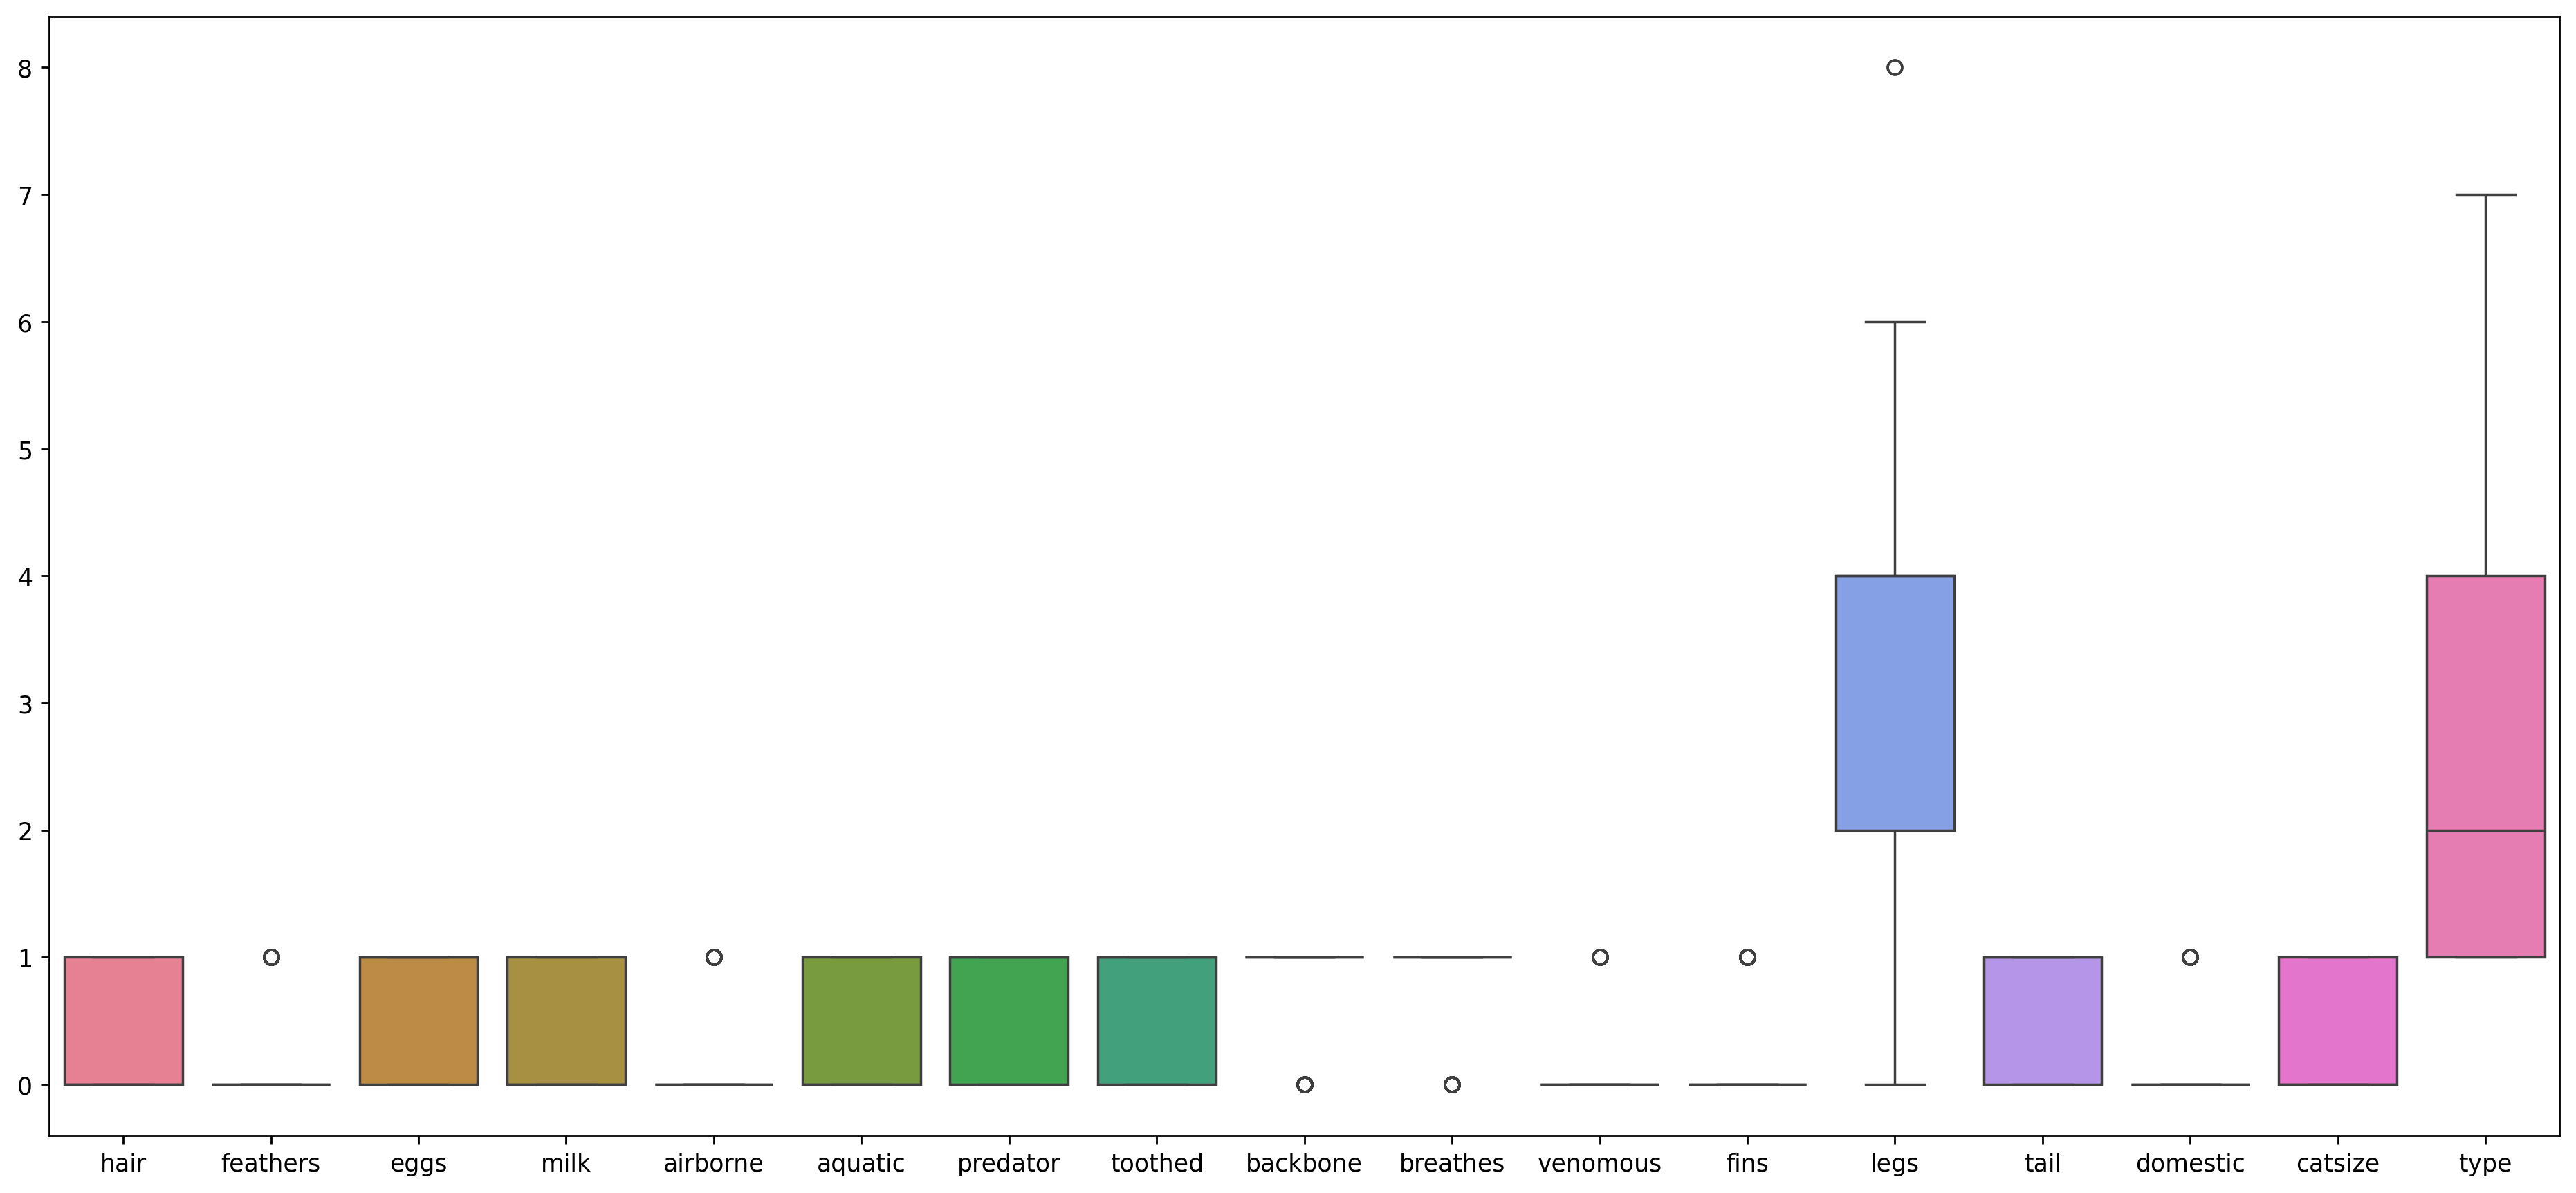

In [18]:
# checking for outliers
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(df)
plt.tight_layout()

In [19]:
# there are some columns having outliers
# I need to deal with these values by capping them

In [20]:
# function for capping outliers
def capping(data, columns):
    for col in columns:
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            IQR = q3 - q1
            lower = q1 - (IQR * 1.5)
            upper = q3 + (IQR * 1.5)
            data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))

In [21]:
# capping outliers
capping(df, df.columns)

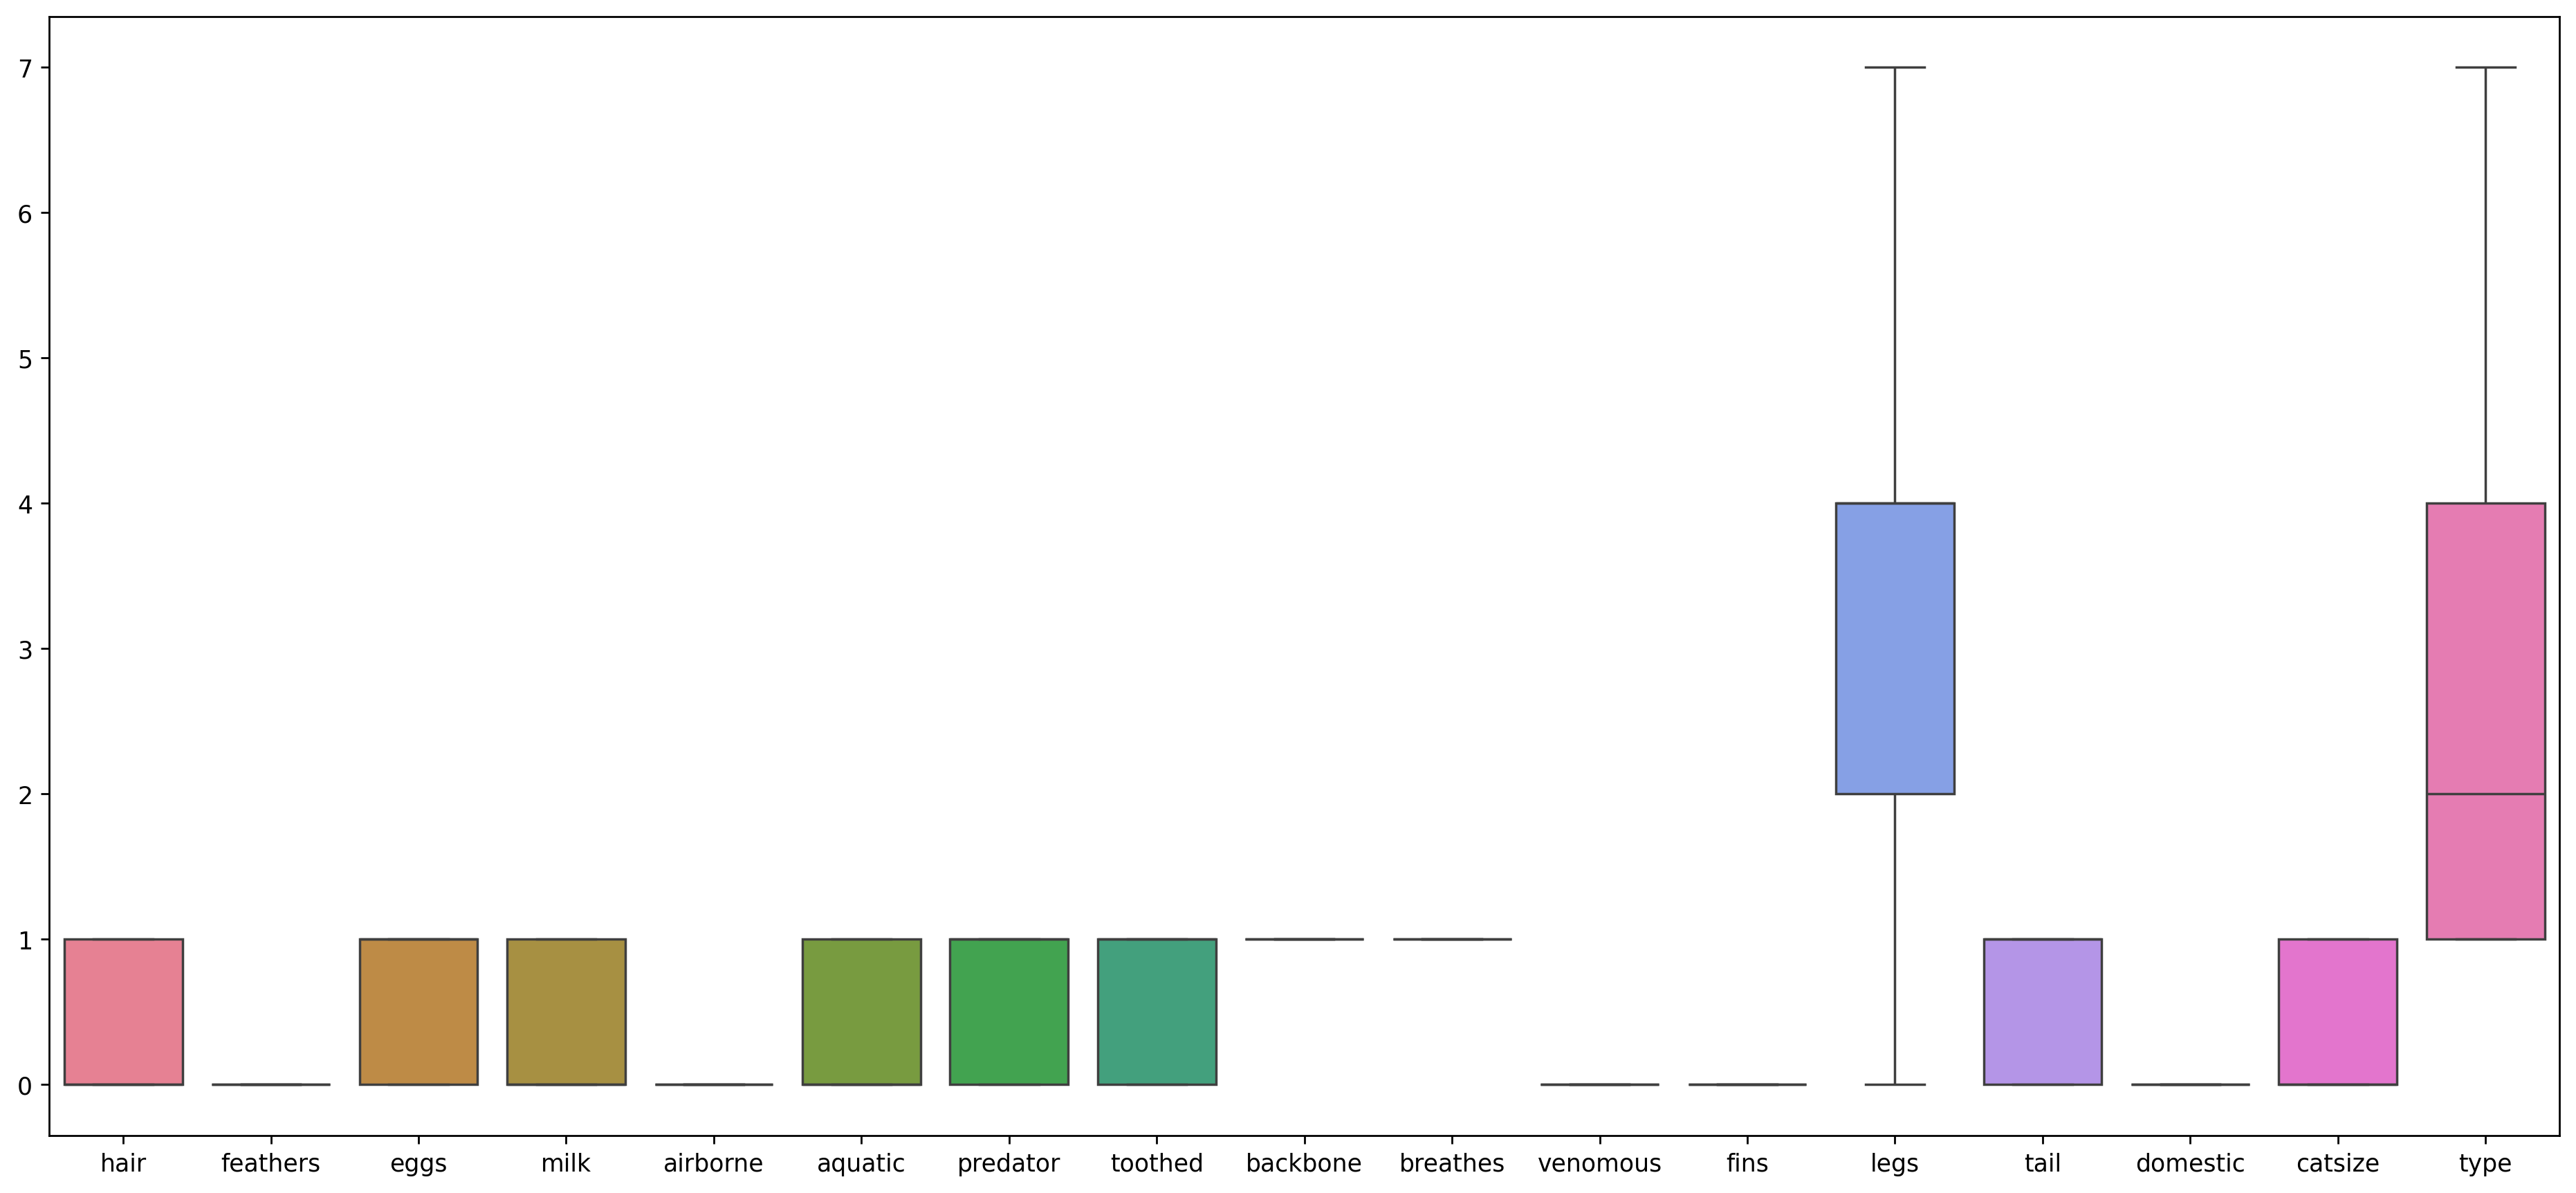

In [22]:
# checking for outliers
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(df)
plt.tight_layout()

In [ ]:
# outliers has been capped

# DATA TRANSFORMATION

In [23]:
# Scalling is necessary for the KNN because in the backend it calculates distances from the nearest datapoints

In [24]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0


In [27]:
# defining x and y variables
x = df.drop(columns='type')
y = df['type']

In [29]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0


In [30]:
y.head()

0    1.0
1    1.0
2    4.0
3    1.0
4    1.0
Name: type, dtype: float64

In [31]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 1.16139451,  0.        , -1.18522652, ..., -1.69841555,
         0.        ,  1.13818037],
       [ 1.16139451,  0.        , -1.18522652, ...,  0.58878406,
         0.        ,  1.13818037],
       [-0.86103386,  0.        ,  0.84372057, ...,  0.58878406,
         0.        , -0.87859537],
       ...,
       [ 1.16139451,  0.        , -1.18522652, ...,  0.58878406,
         0.        ,  1.13818037],
       [-0.86103386,  0.        ,  0.84372057, ..., -1.69841555,
         0.        , -0.87859537],
       [-0.86103386,  0.        ,  0.84372057, ...,  0.58878406,
         0.        , -0.87859537]])

In [32]:
# just for understanding
pd.DataFrame(x_scaled, columns=x.columns)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
1,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
2,-0.861034,0.0,0.843721,-0.826640,0.0,1.343710,0.896421,0.809776,0.0,0.0,0.0,0.0,-1.427250,0.588784,0.0,-0.878595
3,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
4,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,-0.415655,0.588784,0.0,1.138180
97,1.161395,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,1.607534,-1.698416,0.0,-0.878595
98,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
99,-0.861034,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,-1.427250,-1.698416,0.0,-0.878595


In [64]:
# splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
# confirming
xtrain.head(4)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
26,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
42,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
70,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0


In [65]:
xtest.head(4)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
55,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
66,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
67,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0


In [66]:
ytrain.head(4)

89    5.0
26    5.0
42    6.0
70    1.0
Name: type, dtype: float64

In [67]:
ytest.head(4)

84    1.0
55    1.0
66    1.0
67    1.0
Name: type, dtype: float64

# MODEL 

In [68]:
# KNN MODELS class
# Now, I don't know the correct number of nearest neighbors so I am randomly selecting 3 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# training model
knn.fit(xtrain, ytrain)

# getting prediction
ypred = knn.predict(xtest)
ypred

array([1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 4., 6., 6., 2., 7., 1., 1.,
       2., 4., 1., 4.])

In [69]:
# model evaluation
print(f'training accuracy: {knn.score(xtrain, ytrain)}')
print(f'testing accuracy: {knn.score(xtest, ytest)}')
print('--'*30)
print(classification_report(ytest, ypred))

training accuracy: 0.975
testing accuracy: 0.9523809523809523
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [70]:
# there is overfitting in the model because the difference between training accuracy and testing accuracy is more than 3%
# solution is hyperparameter tunning

# HYPERPARAMETER TUNNING

In [71]:
train_acc = []
test_acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [72]:
train_acc

[1.0,
 0.975,
 0.975,
 0.975,
 0.9125,
 0.9125,
 0.9,
 0.825,
 0.8375,
 0.825,
 0.8375,
 0.7875,
 0.7875,
 0.7375,
 0.7375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7375]

In [73]:
test_acc

[0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8095238095238095,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

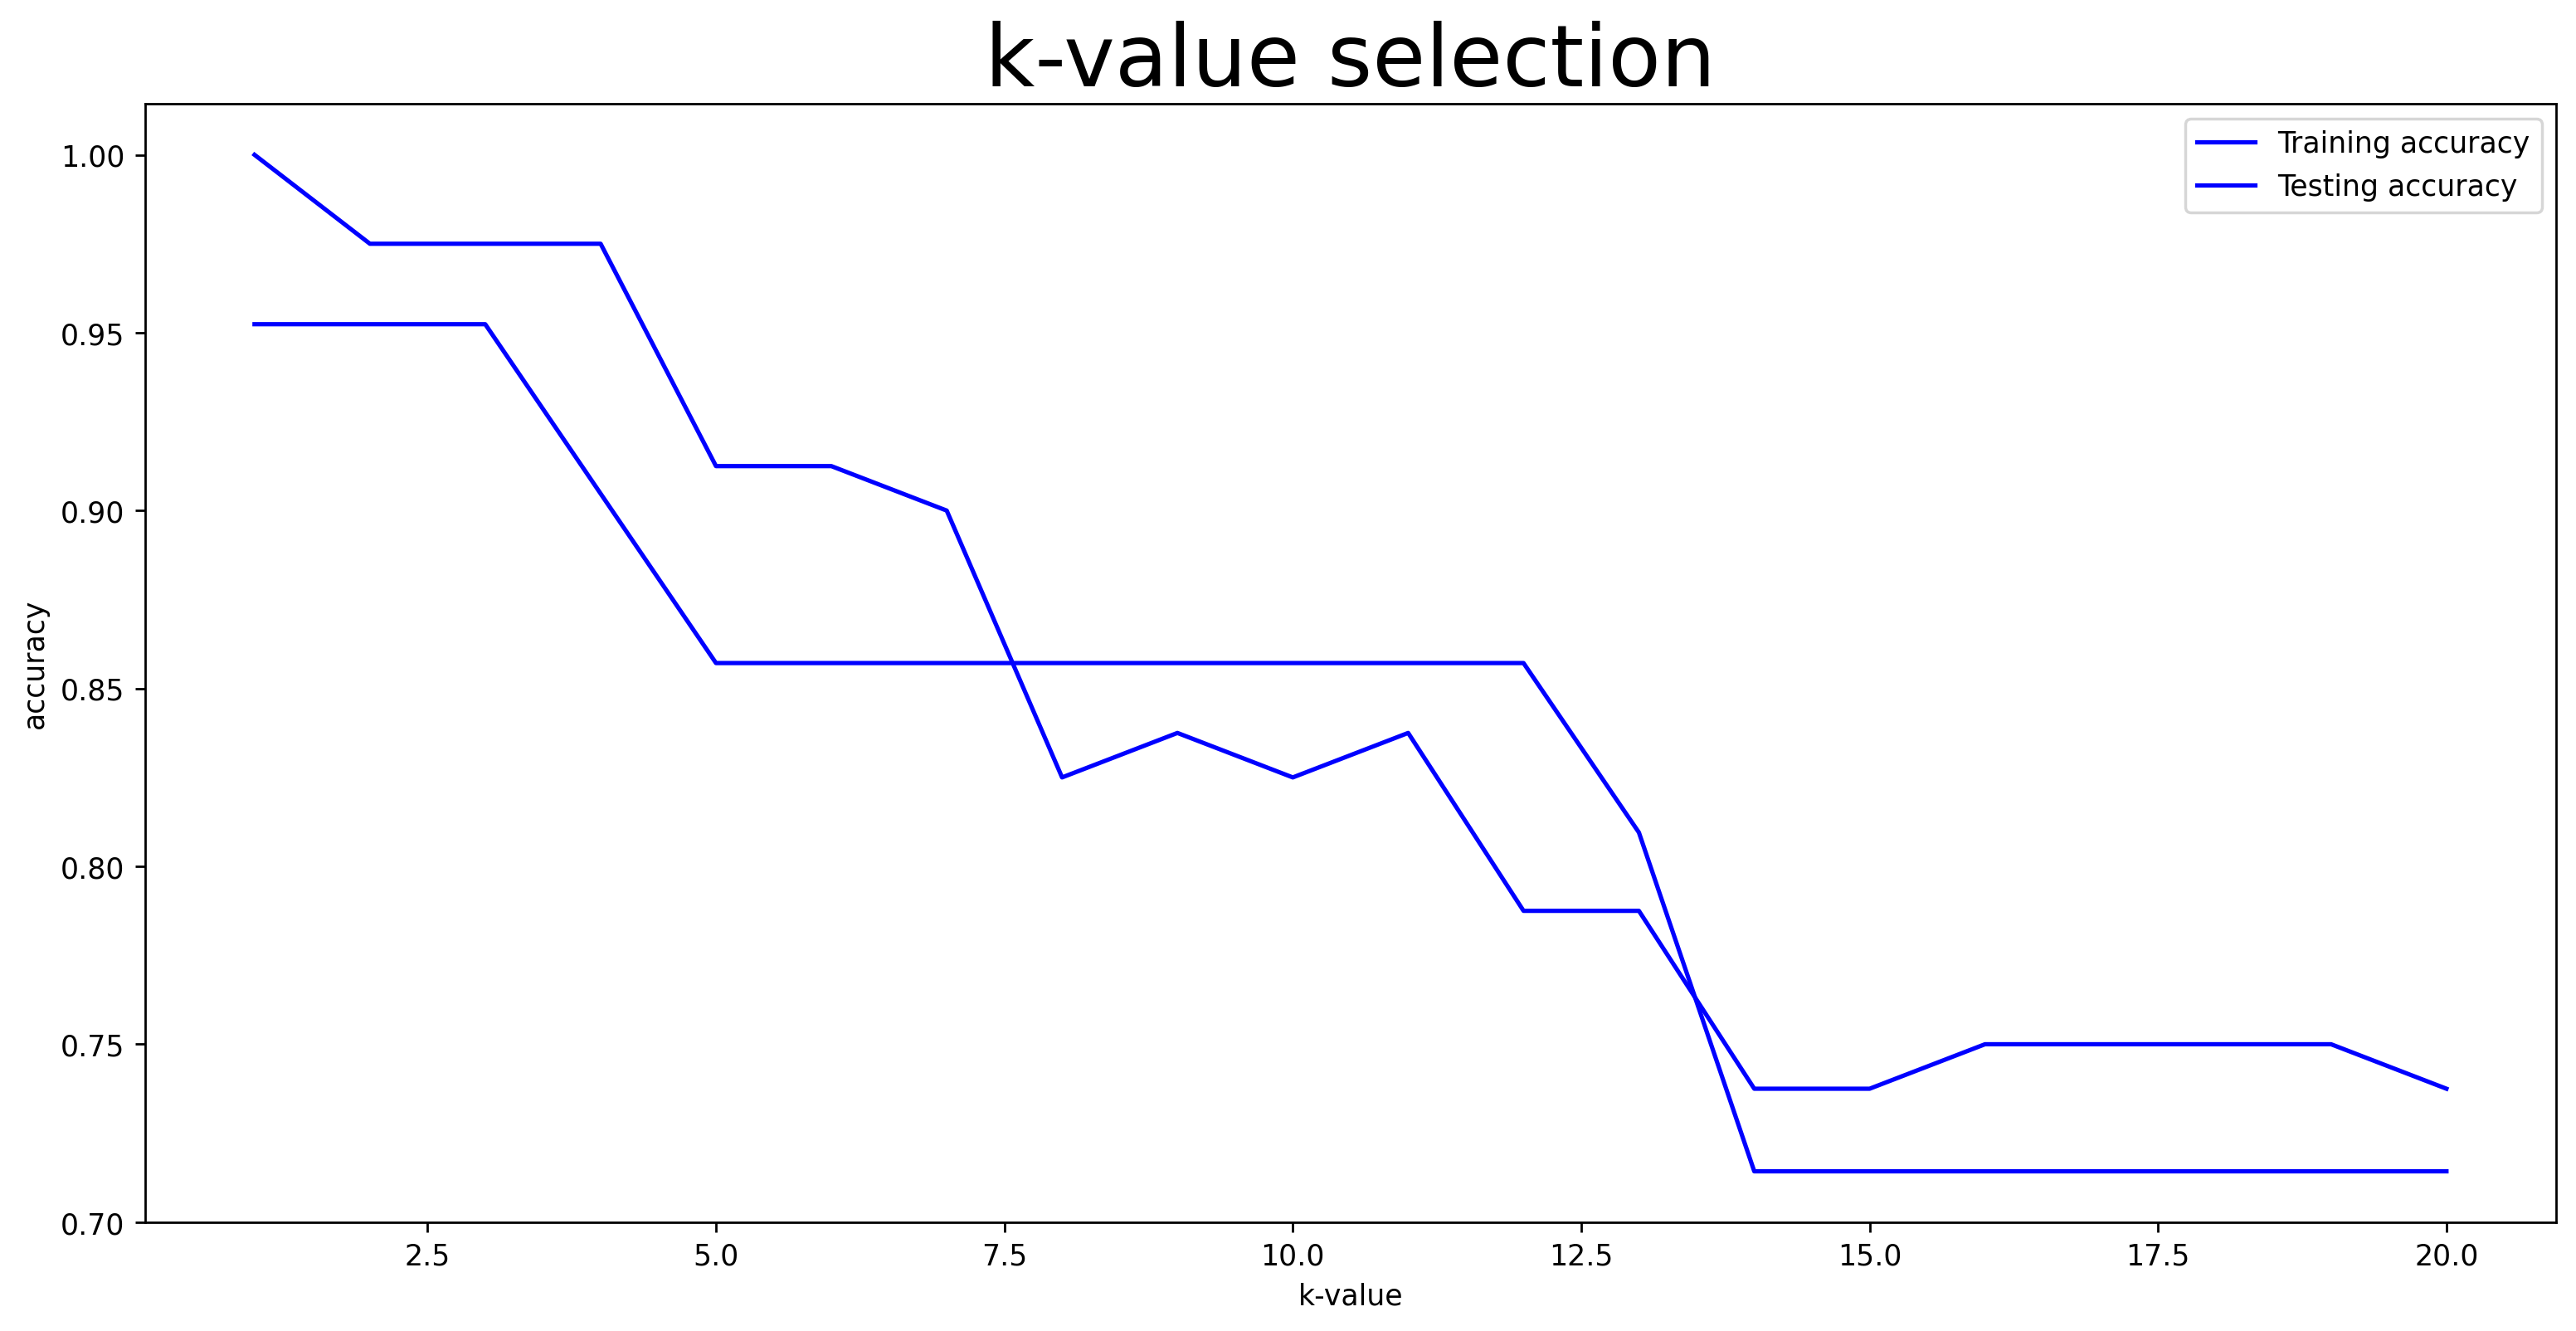

In [74]:
# plotting graph to get the best paarmeter(number of nearest neighbors)
plt.plot(range(1, 21), train_acc, color='blue', label='Training accuracy')
plt.plot(range(1, 21), test_acc, color='blue', label='Testing accuracy')
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.title('k-value selection', size=30)
plt.legend()

In [75]:
# almost 8 is the correct values for K

# FINAL MODEL

In [81]:
# building model with k=14
knn_final = KNeighborsClassifier(n_neighbors=8)
# training
knn_final.fit(xtrain, ytrain)
# prediction
pred = knn_final.predict(xtest)
pred

array([1., 1., 4., 1., 1., 6., 1., 1., 1., 1., 4., 6., 6., 2., 4., 1., 1.,
       2., 4., 1., 4.])

In [82]:
# model evaluation
print(f'training accuracy: {knn_final.score(xtrain, ytrain)}')
print(f'testing accuracy: {knn_final.score(xtest, ytest)}')
print('--'*30)
print(classification_report(ytest, pred))

training accuracy: 0.825
testing accuracy: 0.8571428571428571
------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.40      1.00      0.57         2
         6.0       1.00      1.00      1.00         3
         7.0       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



In [83]:
# size of the data
df.shape

(101, 17)

In [78]:
# now I am getting generalized model because there is no overfitting in the model
# accuracy is 86%
# if I want to increase the accuracy of the model then I need to increase the amount of data

In [ ]:
KNeighborsClassifier()

In [ ]:
# Interview Questions:
# 1. What are the key hyperparameters in KNN?
#     n_neighbors(number of nearest neighbors)
#     weights,
#     algorithm,
#     leaf_size,
#     p,
#     metric,
#     metric_params,
#     n_jobs
# among these the most import parameter is n_neighbors to find out the nearest neighbors to classify the datapoints


# 2. What distance metrics can be used in KNN?
#         Euclidean Distance
#         Manhattan Distance
#         Minkowski Distance
#         Chebyshev Distance
#         Cosine Similarity
#         Hamming Distance